In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
def Plotting(U): #построение графика
    npU = np.array(U)
    plt.plot(npU[:,0],npU[:,1],'-')
    
    xmax = max(npU[:,0])
    ymax = max(npU[:,1])
    maxx = max(ymax,xmax) + 0.1
    plt.ylim(-maxx, maxx)
    plt.xlim(-maxx, maxx)
    
    plt.axhline(0, color = 'black')
    plt.axvline(0, color = 'black')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.grid()
    plt.show()

In [3]:
def Ellipse(A): #построение эллипса
    U = []
    X = np.arange(-1/np.sqrt(A[0,0])+0.00001, 1/np.sqrt(A[0,0]), 0.001)
    for x in X:
        y = np.sqrt((1-A[0,0]*x*x)/(A[1,1]))
        U.append(np.array([x,y]))
    for x in X[::-1]:
        y = -np.sqrt((1-A[0,0]*x*x)/(A[1,1]))
        U.append(np.array([x,y]))
    return U

In [4]:
def Mul_U(A,U): #умножение оператора на множество точек
    AU = [] 
    for i in range(len(U)):
        AU.append(np.copy(A @ U[i]))
    return AU

In [5]:
def Add_U(U1,U2): #cумма точек мн-ва 

    Sum = []
    for i in range(len(U1)):
        for j in range(len(U2)):
            Sum.append(np.copy(U1[i] + U2[j]))
    return Sum

In [6]:
A1 = np.array([[14,0],[0,2]],dtype = float)
U1 = Ellipse(A1)

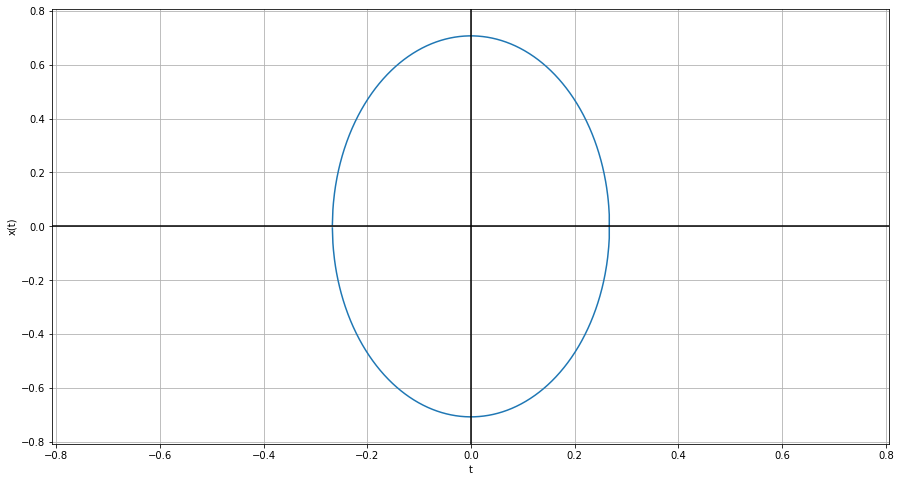

In [7]:
Plotting(U1)

In [8]:
Theta = np.array([[0.5,np.sqrt(3)/2],[-np.sqrt(3)/2,1/2]],dtype = float)
A2 = np.array([[2,0],[0,14]], dtype = float)
xTA2x = Ellipse(A2)
U2 = Mul_U(Theta, xTA2x)

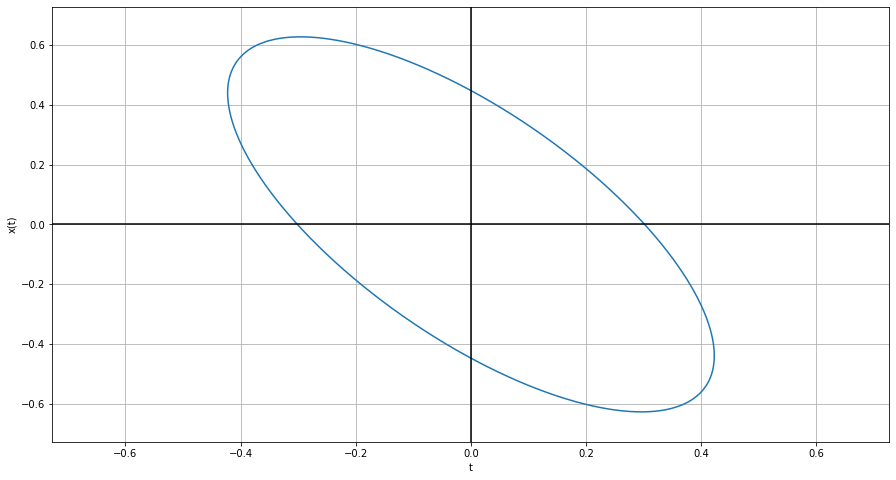

In [9]:
Plotting(U2)

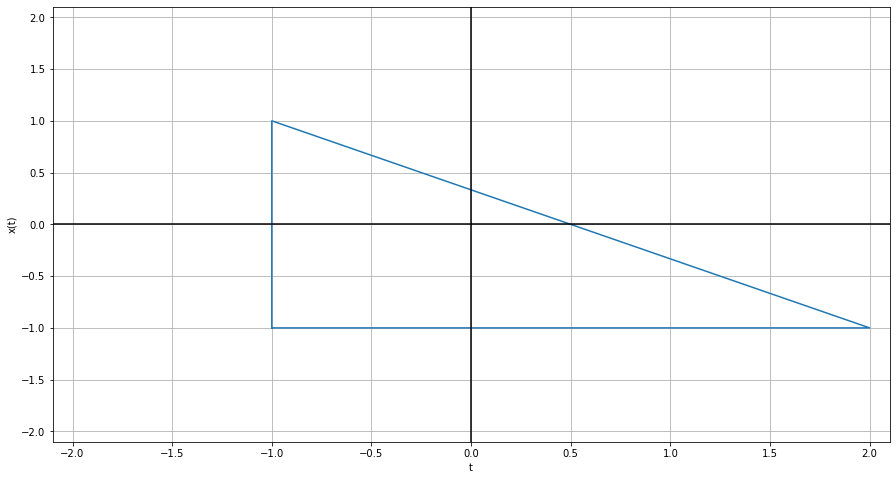

In [10]:
U3 = [[-1,-1],[-1,1],[2,-1],[-1,-1]]
U3 = [np.array(u3, dtype = float) for u3 in U3]
Plotting(U3)

In [11]:
U1U2 = Add_U(U1,U2)

In [12]:
hull = ConvexHull(U1U2)

In [13]:
U1U2 = [U1U2[int(hull.vertices[i])] for i in range(len(hull.vertices))]

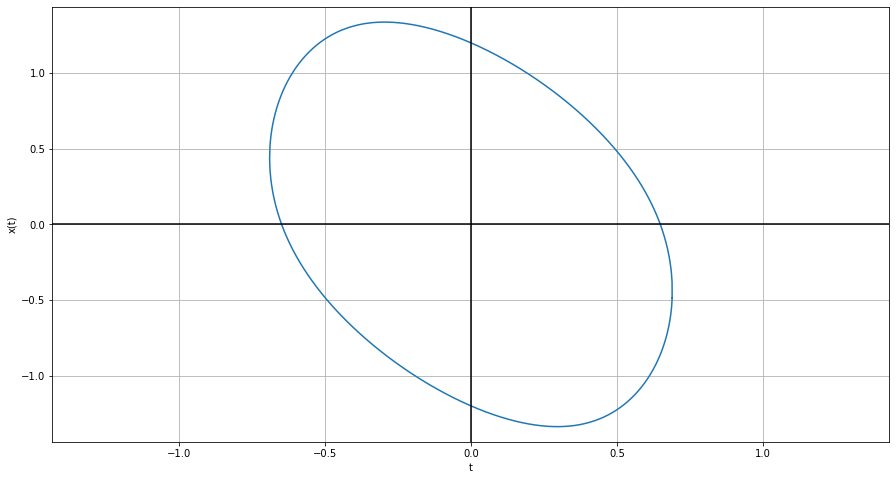

In [14]:
Plotting(U1U2)

In [15]:
U1U2U3 = Add_U(U1U2, U3)
hull = ConvexHull(U1U2U3)
U1U2U3 = [U1U2U3[int(hull.vertices[i])] for i in range(len(hull.vertices))]

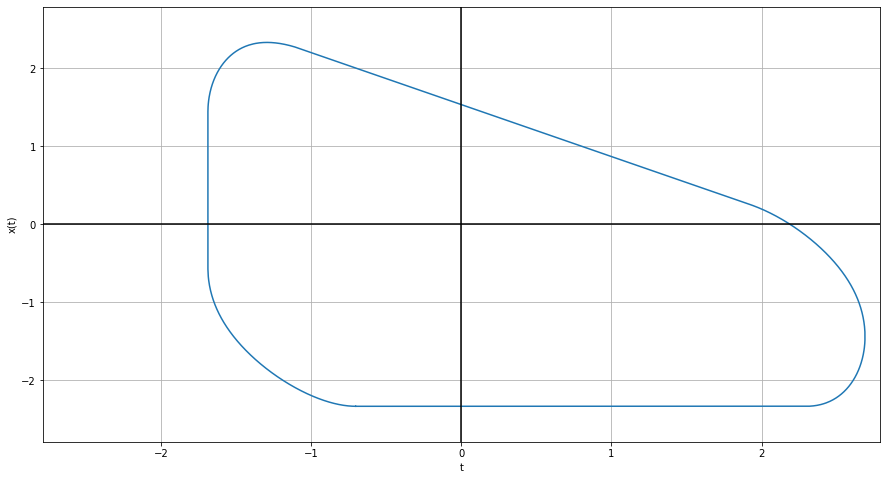

In [16]:
Plotting(U1U2U3)

In [2]:
x0 = lambda t: 2*np.exp(t)


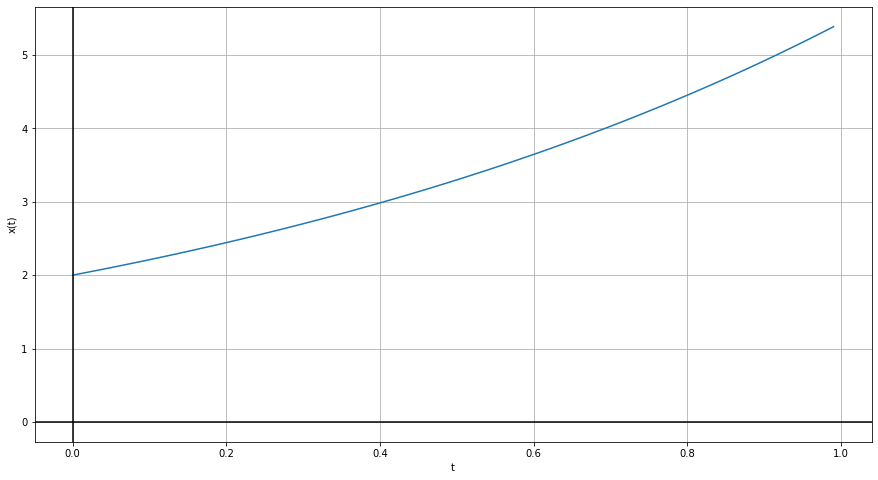

In [71]:
tt = np.arange(0,1,0.01)
plt.plot(tt,x0(tt))
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()

In [26]:
def A1(f):
    tt1 = list(np.arange(2/3,1,0.01))
    tt2 = list(np.arange(0,1/3,0.01))
    tt3 = list(np.arange(1/3,2/3,0.01))
    ff1 = [-f(t) for t in tt1]
    ff2 = [-f(t) for t in tt2]
    ff3 = [f(t) for t in tt3]
    return ff1 + ff2 + ff3

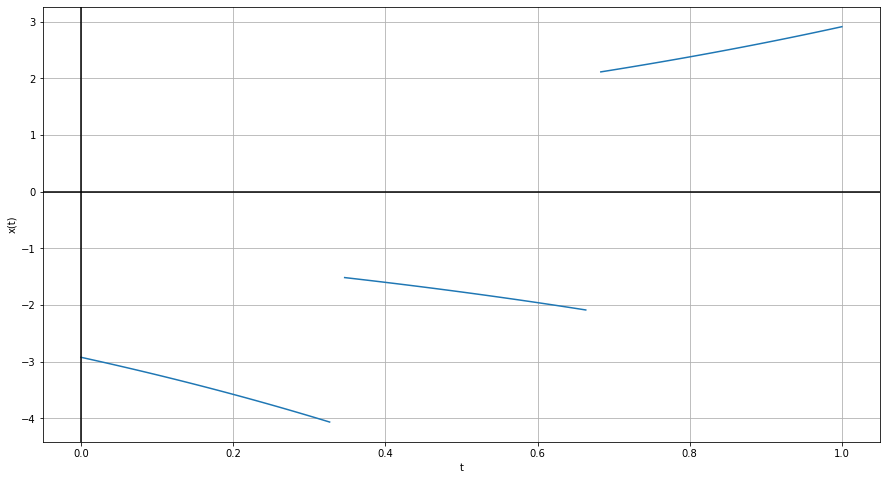

In [76]:
xx = A1(x0)
xx = [0.75 * x for x in xx]
tt = np.linspace(0,1,len(xx))
tt[(tt>1/3) & (tt < 1/3+0.01) ] = np.nan
tt[(tt>2/3) & (tt < 2/3+0.01) ] = np.nan
plt.plot(tt,xx,'-')
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()

In [67]:
def A2(f):
    tt2 = list(np.arange(2/3,1,0.01))
    tt3 = list(np.arange(0,1/3,0.01))
    tt1 = list(np.arange(1/3,2/3,0.01))
    ff1 = [-f(t) for t in tt1]
    ff2 = [f(t) for t in tt2]
    ff3 = [-f(t) for t in tt3]
    return ff1 + ff2 + ff3

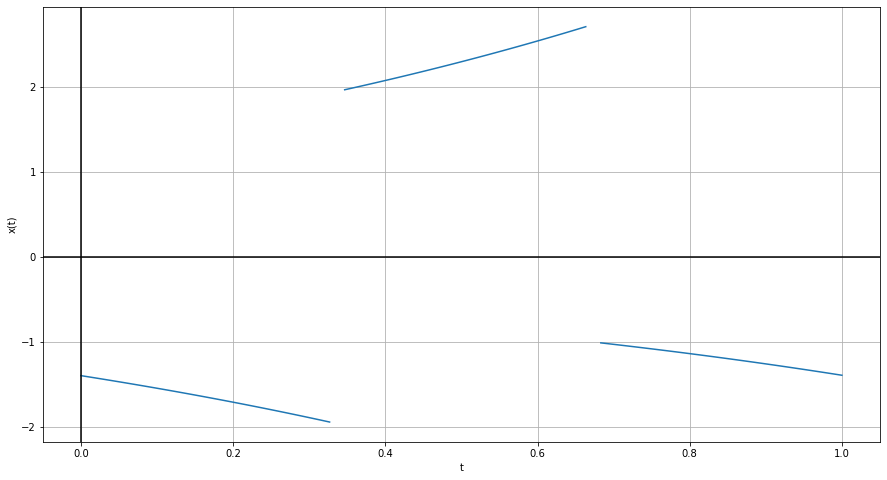

In [77]:
xx = A2(x0)
xx = [0.5 * x for x in xx]
tt = np.linspace(0,1,len(xx))
tt[(tt>1/3) & (tt < 1/3+0.01) ] = np.nan
tt[(tt>2/3) & (tt < 2/3+0.01) ] = np.nan
plt.plot(tt,xx,'-')
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()

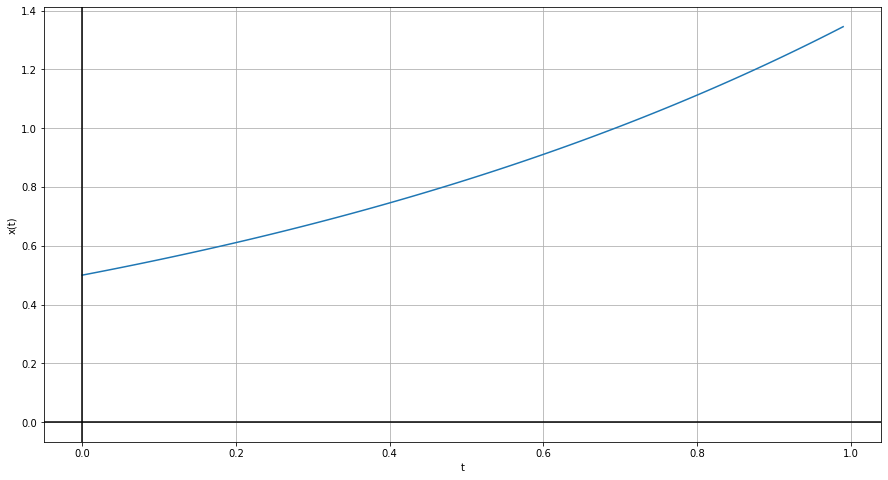

In [79]:
tt = np.arange(0,1,0.01)
plt.plot(tt,0.25*x0(tt))
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()